### Multinomial Naive Bayes

This is an update version of Carme's Jupyter. She implemented a Simple Multinomial Naive Bayes. This new version allows the correction of zero probability effect through the alpha hyperparameter. If alpha = 1, Laplace correction is computed. When 0 < alpha < 1, the correction is called Lipstone. Finally, if alpha = 0, the simple Multinomial Naive Bayes is computed. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [127]:
import numpy as np

class MultinomialNaiveBayes():
    def __init__(self, alpha = 1):
        self.prob_vec = {}
        self.classes  = []
        self.alpha = alpha
        
    def fit(self,X,y):
        # extract the probabilities for each element for different classes
        self.classes = np.unique(y)
        occurences = np.where(X != 0, 1.0, 0.0)
        for c in self.classes:
            idx = np.where(y==c)[0]
            N = len(idx)
            
            self.prob_vec[c] = np.log((np.sum(occurences[idx,:],axis=0) + self.alpha)/(N + self.alpha*X.shape[0])+1e-10)
        
    def predict_proba(self,X):
        #Output matrix N_documents X N_classes
        probs = np.zeros((X.shape[0],len(self.classes)))
        i=0
        for k in self.classes:

            probs[:,i] = np.dot(X,self.prob_vec[k].T).ravel()
            i+=1
        return probs
    
    def predict(self,X):
        return self.classes[np.argmax(self.predict_proba(X),axis =1)]

### Mock problem

In [128]:
X=np.array([[1,1,1,0,0,0],[0,1,1,0,0,1],[0,0,0,1,1,1],[1,0,1,1,1,0]],dtype=np.float)

In [129]:
y = [0,0,1,1]

In [130]:
clf = MultinomialNaiveBayes()

In [131]:
clf.fit(X,y)

In [132]:
clf.classes

array([0, 1])

In [133]:
clf.prob_vec

{0: array([-1.09861229, -0.69314718, -0.69314718, -1.79175947, -1.79175947,
        -1.09861229]),
 1: array([-1.09861229, -1.79175947, -1.09861229, -0.69314718, -0.69314718,
        -1.09861229])}

In [134]:
clf.predict_proba(X)

array([[-2.48490665, -3.98898405],
       [-2.48490665, -3.98898405],
       [-4.68213123, -2.48490665],
       [-5.37527841, -3.58351894]])

In [135]:
clf.predict(X)

array([0, 0, 1, 1])

### NY Times dataset

In [136]:
#load data
import pandas as pd
data=pd.read_csv('./files11/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')

In [137]:
import numpy as np
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
split = pd.to_datetime(pd.Series(data['Date']))<pd.datetime(2004, 1, 1)
raw_data = data['Title']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]
print ('Check the split sizes, train, test and total amount of data:')
print (raw_train.shape, raw_test.shape, raw_data.shape)
print ('Display the labels:')
print (np.unique(y))

Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29 30
 31 99]


In [138]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 
# stop words such as 'and', 'the', 'of' are removed                             
 stop_words='english', 
 strip_accents='unicode')

#example of the tokenization
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Process and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokens:")
print (vectorizer.get_feature_names()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 8950

Extract of tokens:
['boeing', 'boiling', 'boils', 'bold', 'bolster', 'bolsters', 'bolt', 'bolts', 'bomb', 'bombay', 'bombed', 'bomber', 'bombers', 'bombing', 'bombings', 'bombs', 'bonanza', 'bond', 'bondage', 'bonds', 'bone', 'bones', 'bonn', 'bono', 'bonus', 'bonuses', 'book', 'books', 'booksellers', 'bookstore', 'boom', 'boomers', 'booming', 'booms', 'boost', 'boot', 'bora', 'border', 'borders', 'born', 'borough', 'boroughs', 'borrow', 'borrowing', 'bosnia', 'bosnian', 'bosnians', 'boss', 'bosses', 'boston', 'botched', 'bottle', 'bought', 'bounce', 'bound', 'bounty', 'bout', 'bow', 'bowing', 'bowl', 'bows', 'box', 'boxes

In [139]:
X_train = X_train.todense()
X_train = X_train.astype(np.float)
X_test = X_test.todense()
X_test = X_test.astype(np.float)
y_train = np.array(y_train.tolist())

### Our Multinomial NaiveBayes

classification accuracy: 0.489932885906
Classification Report:
             precision    recall  f1-score   support

          1       0.59      0.47      0.52       144
          2       0.15      0.63      0.25        68
          3       0.58      0.68      0.63       371
          4       0.03      0.33      0.06         3
          5       0.12      0.65      0.20        34
          6       0.44      0.76      0.56       115
          7       0.09      0.36      0.14        14
          8       0.11      0.73      0.19        11
         10       0.12      0.62      0.20        24
         12       0.46      0.47      0.47       427
         13       0.05      0.67      0.09         3
         14       0.03      0.83      0.07         6
         15       0.20      0.50      0.29       133
         16       0.61      0.53      0.57      1540
         17       0.18      0.79      0.30        33
         18       0.00      0.00      0.00         4
         19       0.78      0.39   

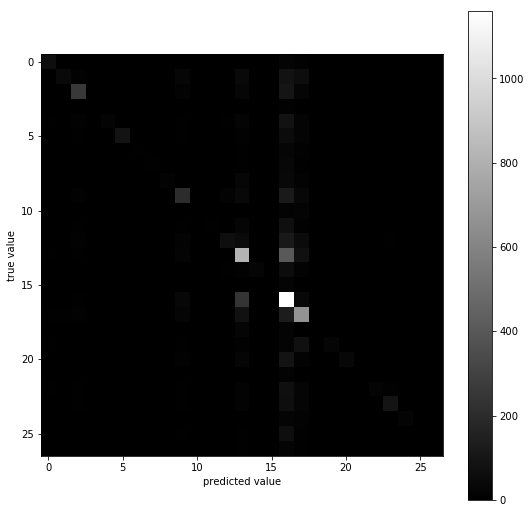

In [143]:
clf = MultinomialNaiveBayes(alpha = 1)       # Laplace correction
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

###  Result of sklearn Multinomial

classification accuracy: 0.53355704698
Classification Report:
             precision    recall  f1-score   support

          1       0.70      0.44      0.54       181
          2       0.26      0.58      0.36       124
          3       0.70      0.59      0.64       521
          4       0.07      0.67      0.12         3
          5       0.24      0.61      0.34        72
          6       0.64      0.66      0.65       190
          7       0.20      0.50      0.28        22
          8       0.28      0.77      0.41        26
         10       0.23      0.55      0.32        51
         12       0.56      0.39      0.46       629
         13       0.16      0.78      0.27         9
         14       0.11      0.84      0.20        19
         15       0.29      0.39      0.34       249
         16       0.62      0.57      0.60      1440
         17       0.31      0.63      0.42        70
         18       0.04      0.20      0.07         5
         19       0.69      0.50    

C:\Users\gonzalo.espinosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


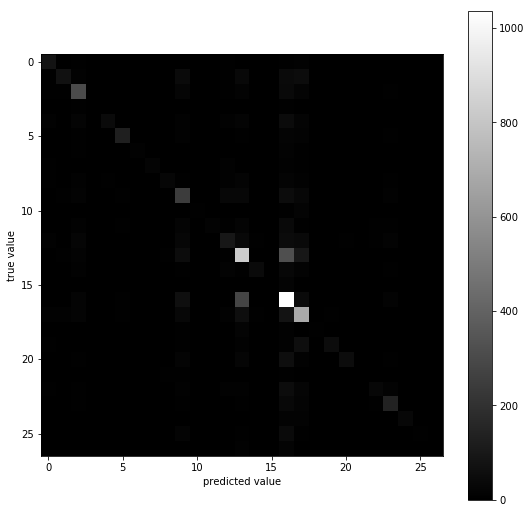

In [141]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)                         # Laplace correction
nb.fit(X_train,y_train)
y_hat = nb.predict(X_test)


from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))